In [6]:
import torch
import numpy as np
from collections import Counter
from torch.utils.data import DataLoader
from tqdm import tqdm
from waveguide_dataset import WaveguideDataset  # or waveguide_dataset_no_normalize
from matplotlib import pyplot as plt
from waveguide_dataset_no_normalize import WaveguideDatasetnonormal
dataset = WaveguideDatasetnonormal('train_test_split.h5')
# Load dataset
# dataset = WaveguideDataset('train_test_split.h5')
loader = DataLoader(dataset, batch_size=512, shuffle=False)

# Store mode vectors (first 4 entries of cond)


In [7]:
all_modes = []
all_weights = []
all_waveguides = []
all_params = []

for cond, params, waveguides in tqdm(loader):
    modes = cond[:, :4]  # Extract first 4 elements
    weights = cond[:, 4:]

    all_modes.append(modes.numpy())
    all_weights.append(weights.numpy())
    all_params.append(params)
    all_waveguides.append(waveguides)


100%|██████████| 2147/2147 [05:38<00:00,  6.33it/s]


In [12]:
mode_strs = [tuple(np.round(np.sort(mode), decimals=3)) for mode in all_modes]

# Count occurrences
mode_counter = Counter(mode_strs)

# Find duplicates
duplicates = {mode: count for mode, count in mode_counter.items() if count > 1}

print(f"Total unique (order-agnostic) modes: {len(mode_counter)}")
print(f"Number of repeated mode vectors: {len(duplicates)}")
print("Sample of repeated sorted modes (rounded to 5 decimals):")

top_duplicates = sorted(duplicates.items(), key=lambda item: item[1], reverse=True)[:10]

for mode, count in top_duplicates:  # show first 10
    print(f"Sorted mode: {mode}, Count: {count}")


Total unique (order-agnostic) modes: 908676
Number of repeated mode vectors: 12110
Sample of repeated sorted modes (rounded to 5 decimals):
Sorted mode: (np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.498)), Count: 189
Sorted mode: (np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.425)), Count: 184
Sorted mode: (np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.376)), Count: 184
Sorted mode: (np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.422)), Count: 183
Sorted mode: (np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.483)), Count: 182
Sorted mode: (np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.464)), Count: 182
Sorted mode: (np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.421)), Count: 182
Sorted mode: (np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.328)), Count: 181
Sorted mode: (np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.548)), Count: 

In [23]:
from collections import Counter
import numpy as np

mode_decimals = 3
weight_decimals = 0

paired_and_sorted = []

for mode_batch, weight_batch in zip(all_modes, all_weights):
    mode_batch = np.squeeze(np.array(mode_batch))    # [B, 4]
    weight_batch = np.squeeze(np.array(weight_batch))  # [B, 4]

    # Ensure 2D
    if mode_batch.ndim == 1:
        mode_batch = mode_batch.reshape(1, -1)
    if weight_batch.ndim == 1:
        weight_batch = weight_batch.reshape(1, -1)

    for mode, weight in zip(mode_batch, weight_batch):
        rounded_mode = np.round(mode, mode_decimals)
        rounded_weight = np.round(weight, weight_decimals)

        pair = list(zip(rounded_mode, rounded_weight))  # [(mode1, wt1), ..., (mode4, wt4)]
        pair_sorted = tuple(sorted(pair, key=lambda x: float(x[0])))  # sort by mode value
        paired_and_sorted.append(pair_sorted)

# Count duplicates
counter = Counter(paired_and_sorted)
duplicates = {k: v for k, v in counter.items() if v > 1}

# Top 10 repeated
top_duplicates = sorted(duplicates.items(), key=lambda item: item[1], reverse=True)[:10]

print(f"Total unique (mode, weight) tuples: {len(counter)}")
print(f"Number of repeated (mode, weight) tuples: {len(duplicates)}")
print("Top 10 most duplicated (mode, weight) pairs (rounded to 3 decimals):")
for pair, count in top_duplicates:
    print(f"{pair}, Count: {count}")


Total unique (mode, weight) tuples: 937084
Number of repeated (mode, weight) tuples: 15174
Top 10 most duplicated (mode, weight) pairs (rounded to 3 decimals):
((np.float32(0.0), np.float32(0.0)), (np.float32(0.0), np.float32(0.0)), (np.float32(0.0), np.float32(0.0)), (np.float32(1.451), np.float32(99.0))), Count: 65
((np.float32(0.0), np.float32(0.0)), (np.float32(0.0), np.float32(0.0)), (np.float32(0.0), np.float32(0.0)), (np.float32(1.43), np.float32(99.0))), Count: 63
((np.float32(0.0), np.float32(0.0)), (np.float32(0.0), np.float32(0.0)), (np.float32(0.0), np.float32(0.0)), (np.float32(1.52), np.float32(99.0))), Count: 60
((np.float32(0.0), np.float32(0.0)), (np.float32(0.0), np.float32(0.0)), (np.float32(0.0), np.float32(0.0)), (np.float32(1.408), np.float32(99.0))), Count: 59
((np.float32(0.0), np.float32(0.0)), (np.float32(0.0), np.float32(0.0)), (np.float32(0.0), np.float32(0.0)), (np.float32(1.571), np.float32(99.0))), Count: 59
((np.float32(0.0), np.float32(0.0)), (np.float3

In [19]:
from collections import Counter
import numpy as np

def count_duplicates(data_list, decimals=3, name="items"):
    """
    Counts and displays the top duplicates in a list of waveguides or parameters.

    Args:
        data_list: List of numpy arrays (e.g., waveguides or params).
        decimals: Decimal rounding for comparison.
        name: String label for the item type (for printout).
    """
    rounded_data = []

    for item in tqdm(data_list, desc='Counting Duplicates'):
        arr = np.round(np.array(item), decimals=decimals)
        tup = tuple(arr.flatten())  # Flatten to 1D and convert to tuple
        rounded_data.append(tup)

    counter = Counter(rounded_data)
    duplicates = {k: v for k, v in counter.items() if v > 1}

    print(f"Total unique {name}: {len(counter)}")
    print(f"Number of repeated {name}: {len(duplicates)}")
    print(f"Top 10 repeated {name} (rounded to {decimals} decimals):")
    top_duplicates = sorted(duplicates.items(), key=lambda item: item[1], reverse=True)[:10]
    for val, count in top_duplicates:
        print(f"Item (hashable view): {val[:5]}... ({len(val)} elements), Count: {count}")

import torch

def flatten_batches(tensor_list):
    """
    Takes a list of batched tensors (e.g. shape [B, 1, 32, 32]) and flattens into a list of individual items (shape [1, 32, 32]).
    """
    flattened = []
    for batch in tqdm(tensor_list, desc='Flattening'):
        if isinstance(batch, torch.Tensor):
            batch = batch.cpu().numpy()  # convert to NumPy if needed
        for i in range(batch.shape[0]):
            flattened.append(batch[i])  # shape (1, 32, 32)
    return flattened

import numpy as np

def count_not_descending(flattened_batch):
    """
    Counts how many items in a flattened batch are not sorted in descending order.

    Args:
        flattened_batch (list or np.ndarray): A list of 1D numpy arrays or tensors, e.g. [(4,), (4,), ...]

    Returns:
        int: Number of items not in descending order
    """
    count = 0
    for item in tqdm(flattened_batch):
        arr = np.array(item).flatten()
        if not np.all(arr[:-1] >= arr[1:]):
            count += 1
    print(f"Total number of items: {len(flattened_batch)}")
    print(f"Total number of non-ordered lists: {count}")
    return count

import numpy as np

def count_total_weight_above_threshold(flat_weights, n_per_sample=4, threshold=90):
    """
    Count how many samples have total weight above a threshold.
    """
    flat_weights = np.array(flat_weights)
    assert flat_weights.shape[1] == n_per_sample, f"Expected {n_per_sample} per sample, got shape {flat_weights.shape}"

    total_weights = flat_weights.sum(axis=1)
    count = np.sum(total_weights > threshold)
    print(f'total number of items: {len(flat_weights)}')
    print(f"Total items above {threshold}% threshold: {count}")
    print(f"Percentage of total data bove {threshold}% threshold: {(count/len(flat_weights))*100:.2f}%")
    return count




# print(len(flatten_batches(all_modes)))
# count_not_descending(flatten_batches(all_modes))
# count_not_descending(flatten_batches(all_weights))
count_total_weight_above_threshold(flatten_batches(all_weights), 4, 90)
count_total_weight_above_threshold(flatten_batches(all_weights), 4, 85)
count_total_weight_above_threshold(flatten_batches(all_weights), 4, 80)

Flattening: 100%|██████████| 2147/2147 [00:00<00:00, 19019.16it/s]


total number of items: 1098910
Total items above 90% threshold: 896152
Percentage of total data bove 90% threshold: 81.55%


Flattening: 100%|██████████| 2147/2147 [00:00<00:00, 19846.54it/s]


total number of items: 1098910
Total items above 85% threshold: 926849
Percentage of total data bove 85% threshold: 84.34%


Flattening: 100%|██████████| 2147/2147 [00:00<00:00, 19536.32it/s]


total number of items: 1098910
Total items above 80% threshold: 957289
Percentage of total data bove 80% threshold: 87.11%


np.int64(957289)

Text(0, 0.5, 'Loss on test set')

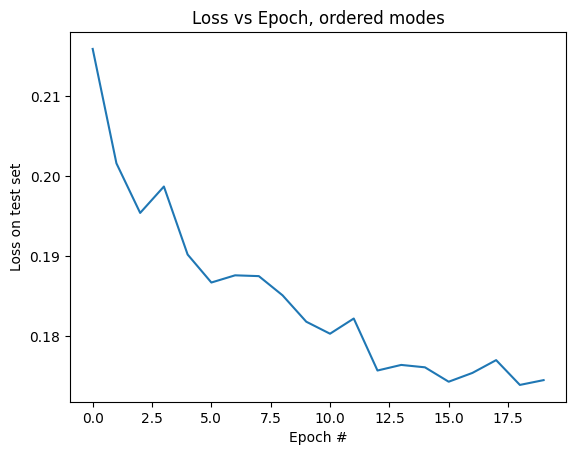

In [3]:
loss = [.2159, .2016, .1954, .1987, .1902, .1867, .1876, .1875, .1851, .1818, .1803, .1822, .1757, .1764, .1761, .1743, .1754, .1770, .1739, .1745]
plt.plot(range(20), loss)
plt.title("Loss vs Epoch, ordered modes")
plt.xlabel('Epoch #')
plt.ylabel('Loss on test set')